In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

In [2]:
# Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


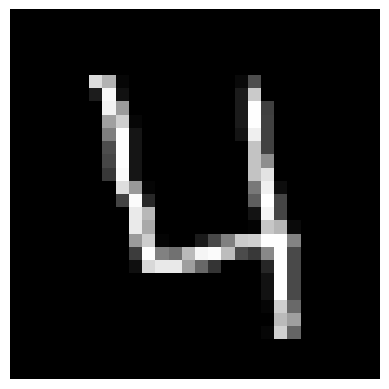

In [3]:
data = np.array(data)

def plot_mnist_image(image_array):
    image = image_array.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.show()

plot_mnist_image(data[3, 1:])

In [4]:
print(data.shape)
m, n = data.shape
print(m,n)
# m is the number of training examples, n is the number of features + 1 (Y column)
# m is # of rows, n is the number of columns

(42000, 785)
42000 785


In [8]:
np.random.shuffle(data) # Shuffles all the individual rows
data_dev = data[0:1000].T #Take the first 1000 rows, and transpose the matrix to get 1000 examples as column vectors
data_dev.shape
# 1000 x 28 x 28

(785, 1000)

In [9]:
Y_dev = data_dev[0] #Takes the first row, which contains all of the answers to the numbers (the Y is what we want)
Y_dev.shape

(1000,)

In [10]:
X_dev = data_dev[1:] # Takes all of the data corresponding to all of the entries (the X values)
X_dev = X_dev / 255. # Normalization
X_dev.shape

(784, 1000)

In [12]:
data_train = data[1000:m].T
data_train[:, 1]

array([  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        25, 132, 161, 253, 172,   2,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  26, 211, 252, 252, 252, 252, 105,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
Y_train = data_train[0] #Takes the first row, which contains all of the answers to the numbers

In [14]:
X_train= data_train[1:n] #Takes all of the data corresponding to all of the entries
X_train
X_train = X_train / 255.
_,m_train = X_train.shape

In [15]:
# Functionalities
def params(batch_size):
  W1 = np.random.rand(15, 784) - 0.5
  b1 = np.random.rand(15, batch_size) - 0.5
  W2 = np.random.rand(10, 15) - 0.5
  b2 = np.random.rand(10, batch_size) - 0.5
  return W1, b1, W2, b2

def ReLU(Z): # Takes in a scalar, returns a scalar
    return np.maximum(Z, 0)

def softmax(Z):
    # Apply softmax column-wise
    exp_Z = np.exp(Z - np.max(Z, axis=0))  # Subtracting the maximum value in each column to avoid overflow
    return exp_Z / np.sum(exp_Z, axis=0)

def forward_prop(W1, b1, W2, b2, X, batch_size):
    Z1 = W1.dot(X) + b1 # (10 x784) (784 x n) + (10 x n) -> (10 x n)
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2 # (10 x 10) (10 x n) + (10 x n) = (10 x n)
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def der_ReLU(Z):
  return Z > 0

def create(Y): # Passing in a 1 x 41000 matrix (41000 columns, 1 row)
  mat_Y = np.zeros((Y.size, 10)) # 41000 x 10
  mat_Y[np.arange(Y.size), Y] = 1 # array([    0,     1,     2, ..., 40997, 40998, 40999]), then indexing the Y values aswell at each column, changing that value to 1
  mat_Y = mat_Y.T # 10 x 41000
  return mat_Y


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y, batch_size):
  mat_Y = create(Y)
  dZ2 = (1/batch_size) * (A2 - mat_Y) # 10 x 41000 - - - Back propogation eq. #1
  dW2 = dZ2.dot(A1.T) # (10 x 41000) (41000 x 10) -> (10 x 10) - - - Back propogation eq. #4
  db2 = np.sum(dZ2) # scalar  - - - Back propogation eq. #3
  dZ1 = (1/batch_size) * (W2.T.dot(dZ2) * der_ReLU(Z1)) # (10 x 10) (10 x 41000) * elementwise (1 or 0) Back propogation eq. #2
  dW1=  dZ1.dot(X.T) # (10 x 41000) (41000 x 784) -> (10 x 784) - - - Back propogation eq. #4
  db1 = np.sum(dZ1) #scalar - - - Back propogation eq. #3
  return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  # print(predictions)
  # print(Y)
  return np.sum(predictions == Y) / Y.size


In [17]:
def stochastic_gradient_descent(X, Y, epochs, alpha, batch_size):
    W1, b1, W2, b2 = params(batch_size)
    num_examples = X.shape[1]

    for i in range(epochs):
        permuted_indices = np.random.permutation(num_examples)
        X_shuffled = X[:, permuted_indices]
        Y_shuffled = Y[permuted_indices]

        for j in range(0, num_examples, batch_size):
            X_batch = X_shuffled[:, j:j + batch_size]
            Y_batch = Y_shuffled[j:j + batch_size]

            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch, batch_size)
            dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X_batch, Y_batch, batch_size)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Print epoch and accuracy formatted nicely
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch, batch_size)
        accuracy = get_accuracy(get_predictions(A2), Y_batch)
        print(f"Epoch: {i:<5} | Accuracy: {accuracy:.2f}")
    
    return W1, b1, W2, b2


In [19]:
W1, b1, W2, b2 = stochastic_gradient_descent(X_train, Y_train, 20, 0.1, 100)

Epoch: 0     | Accuracy: 0.50
Epoch: 1     | Accuracy: 0.56
Epoch: 2     | Accuracy: 0.55
Epoch: 3     | Accuracy: 0.57
Epoch: 4     | Accuracy: 0.58
Epoch: 5     | Accuracy: 0.62
Epoch: 6     | Accuracy: 0.62
Epoch: 7     | Accuracy: 0.65
Epoch: 8     | Accuracy: 0.73
Epoch: 9     | Accuracy: 0.70
Epoch: 10    | Accuracy: 0.76
Epoch: 11    | Accuracy: 0.67
Epoch: 12    | Accuracy: 0.83
Epoch: 13    | Accuracy: 0.80
Epoch: 14    | Accuracy: 0.77
Epoch: 15    | Accuracy: 0.74
Epoch: 16    | Accuracy: 0.76
Epoch: 17    | Accuracy: 0.75
Epoch: 18    | Accuracy: 0.80
Epoch: 19    | Accuracy: 0.79


In [22]:
# Testing our model:

# Create batch from unseen data
training_example = X_dev[:,100:200]
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, training_example, batch_size = 1)
predictions = get_predictions (A2)
print("Predictions:")
print(predictions)
print("Correct labels:")
print(Y_dev[100:200])

print("Accuracy:", get_accuracy(Y_dev[100:200], predictions) * 100, "%")

Predictions:
[4 4 2 6 7 5 3 4 1 1 9 0 3 3 3 2 5 0 9 4 9 9 5 2 0 5 1 1 8 7 3 2 4 0 4 2 1
 1 3 3 0 0 2 3 4 6 8 7 4 3 2 0 8 7 7 5 4 3 7 0 4 5 4 0 0 1 1 8 2 9 0 3 3 0
 4 1 3 7 1 2 0 0 2 7 7 0 3 7 2 6 2 4 4 7 3 3 4 5 3 1]
Correct labels:
[4 4 9 6 7 5 8 9 1 1 4 0 3 3 3 2 5 0 4 4 9 9 5 2 0 5 1 1 8 2 3 2 4 0 9 3 1
 1 3 3 0 0 2 3 4 6 8 7 4 3 2 0 4 7 7 5 4 3 6 0 4 3 4 0 7 1 1 8 2 4 7 3 3 0
 6 1 3 7 1 2 0 1 2 7 7 0 3 7 5 6 2 9 7 7 7 5 4 8 3 4]
Accuracy: 77.0 %
